In [1]:
import os
import zipfile

local_zip = '/data/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

local_zip = '/data/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

In [2]:
laptop_dir = os.path.join('/data/train/laptop')
phone_dir = os.path.join('/data/train/phone')

test_laptop_dir = os.path.join('/data/test/laptop')
test_phone_dir = os.path.join('/data/test/phone')

print('total training laptop images:', len(os.listdir(laptop_dir)))
print('total training phone images:', len(os.listdir(phone_dir)))

print('total test laptop images:', len(os.listdir(test_laptop_dir)))
print('total test phone images:', len(os.listdir(test_phone_dir)))

laptop_files = os.listdir(laptop_dir)
phone_files = os.listdir(phone_dir)

total training laptop images: 601
total training phone images: 601
total test laptop images: 240
total test phone images: 240


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras import applications

In [4]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                               horizontal_flip=True,
                               height_shift_range=0.1,
                               width_shift_range=0.1,
                               preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
	"/data/train/",
    target_size=(200, 200),
    batch_size = 64)


validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	"/data/test/",
	target_size=(200,200),
	class_mode='categorical',
  batch_size=64)

nclass = len(train_generator.class_indices)

Found 1200 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [5]:
base_model = applications.inception_v3.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(150, 150,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(nclass, 
                    activation='softmax'))

model = add_model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
history = model.fit(
    train_generator, 
    epochs=5, 
    batch_size=75,
     steps_per_epoch=9, 
     validation_data = validation_generator, 
     verbose = 1,
     validation_steps=2)

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/5
9/9 [==========================

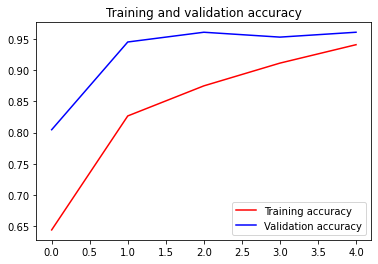

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()